<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-7/Deep_RNN_ReviewTokoBaju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEP RNN on ReviewTokoBaju.csv (TensorFlow)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## **1. Load Dataset**

In [ ]:
df = pd.read_csv('ReviewTokoBaju.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (23486, 12)


In [ ]:
print(df.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  target  
0                        0       Initmates        Intimate  Intimates   

## **2. Preprocessing**

In [ ]:
texts = df['Review Text'].astype(str).values
df['target'] = df['Recommended IND'].astype(int)

In [ ]:
print("\nClass distribution:")
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))


Class distribution:
target
1    19314
0     4172
Name: count, dtype: int64
target
1    0.822362
0    0.177638
Name: proportion, dtype: float64


In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=100)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

## **3. Define Deep RNN Model**

In [ ]:
def create_deep_rnn_model(embedding_dim=128, rnn_units=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=100))
    model.add(SimpleRNN(rnn_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(rnn_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

## **4. Train the Model**

In [ ]:
embedding_dim = 128
rnn_units = 64
dropout_rate = 0.5
batch_size = 128
epochs = 20

In [ ]:
model = create_deep_rnn_model(embedding_dim, rnn_units, dropout_rate)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7860 - loss: 0.5075 - val_accuracy: 0.8709 - val_loss: 0.3154
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8891 - loss: 0.2841 - val_accuracy: 0.8760 - val_loss: 0.2996
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9350 - loss: 0.1867 - val_accuracy: 0.8672 - val_loss: 0.3240
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9581 - loss: 0.1212 - val_accuracy: 0.8864 - val_loss: 0.3962
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9822 - loss: 0.0631 - val_accuracy: 0.8757 - val_loss: 0.4820


## **5. Evaluate the Model**

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\n===== Evaluation Metrics =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


===== Evaluation Metrics =====
Accuracy : 0.8678
Precision: 0.8861
Recall   : 0.9623
F1 Score : 0.9226
AUC      : 0.8883


## **6. Confusion Matrix**

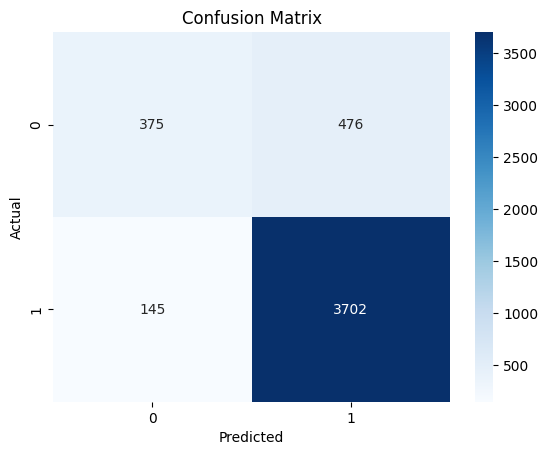

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **7. ROC Curve**

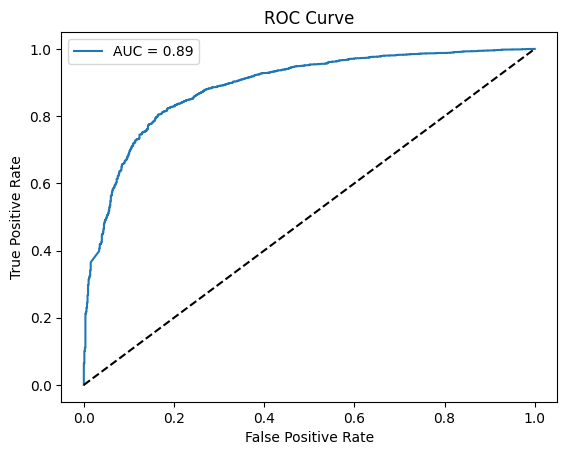

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## **8. Accuracy & Loss Plot**

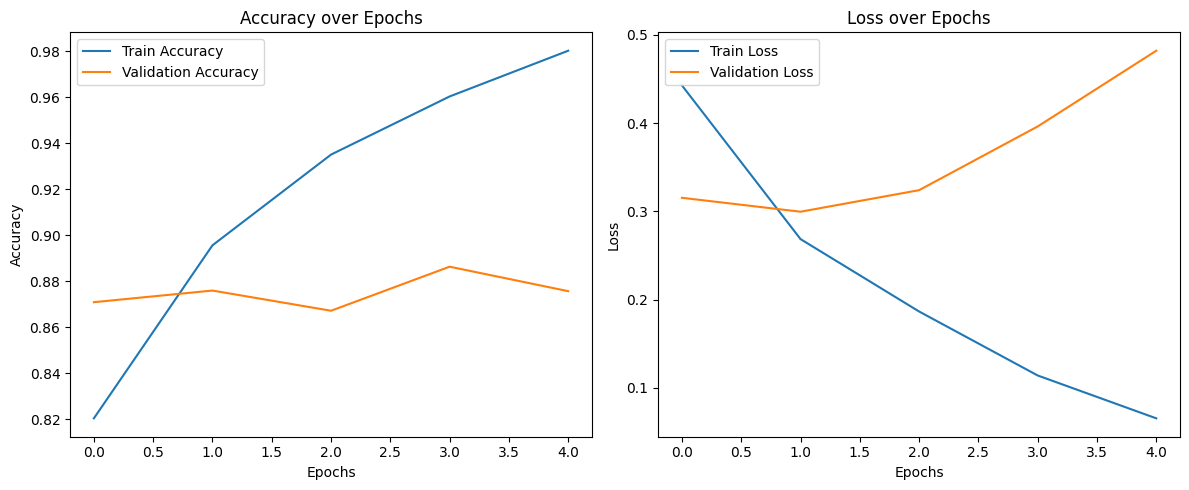

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## **9. Hyperparameter Tuning (Manual Grid)**

In [ ]:
best_acc = 0
best_config = None

In [ ]:
for emb_dim in [64, 128]:
    for rnn_unit in [32, 64]:
        for drop_rate in [0.3, 0.5]:
            print(f"Testing: emb_dim={emb_dim}, rnn_units={rnn_unit}, dropout={drop_rate}")
            temp_model = create_deep_rnn_model(emb_dim, rnn_unit, drop_rate)
            temp_history = temp_model.fit(x_train, y_train,
                                          epochs=5,
                                          batch_size=128,
                                          validation_split=0.2,
                                          verbose=0)
            val_acc = temp_history.history['val_accuracy'][-1]
            print(f"Val Acc: {val_acc:.4f}")
            if val_acc > best_acc:
                best_acc = val_acc
                best_config = (emb_dim, rnn_unit, drop_rate)

Testing: emb_dim=64, rnn_units=32, dropout=0.3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Val Acc: 0.8749
Testing: emb_dim=64, rnn_units=32, dropout=0.5
Val Acc: 0.8731
Testing: emb_dim=64, rnn_units=64, dropout=0.3
Val Acc: 0.8584
Testing: emb_dim=64, rnn_units=64, dropout=0.5
Val Acc: 0.8691
Testing: emb_dim=128, rnn_units=32, dropout=0.3
Val Acc: 0.8539
Testing: emb_dim=128, rnn_units=32, dropout=0.5
Val Acc: 0.8640
Testing: emb_dim=128, rnn_units=64, dropout=0.3
Val Acc: 0.8371
Testing: emb_dim=128, rnn_units=64, dropout=0.5
Val Acc: 0.8611


In [ ]:
print(f"\nBest Config: Embedding={best_config[0]}, RNN Units={best_config[1]}, Dropout={best_config[2]}")
print(f"Best Validation Accuracy: {best_acc:.4f}")


Best Config: Embedding=64, RNN Units=32, Dropout=0.3
Best Validation Accuracy: 0.8749


# **Analisis Hasil Deep RNN Model pada Dataset Review Toko Baju**

Model Deep RNN yang telah dibangun menggunakan dataset ReviewTokoBaju.csv menunjukkan performa klasifikasi yang sangat baik dalam membedakan ulasan positif dan negatif. Tujuan dari studi ini adalah membangun model *Deep Recurrent Neural Network (Deep RNN)* yang mampu mengklasifikasikan sentimen dari ulasan tersebut secara otomatis dan akurat.

### Metode

#### a. **Dataset**

Dataset yang digunakan merupakan kumpulan ulasan pelanggan dari sebuah toko baju, yang telah diberi label sentimen: positif dan negatif.

#### b. **Preprocessing**

* Membersihkan teks dari karakter khusus, angka, dan spasi berlebih.
* Tokenisasi menggunakan `Tokenizer` Keras.
* Padding agar semua input memiliki panjang yang sama.
* Label dikonversi ke nilai biner (0 = negatif, 1 = positif).

#### c. **Arsitektur Model**

Model Deep RNN dibangun menggunakan framework TensorFlow dengan arsitektur sebagai berikut:

* **Embedding Layer**: Mewakili kata dalam bentuk vektor berdimensi 128.
* **2 LSTM Layers** bertingkat: Memproses sekuens kata dengan memori jangka panjang.
* **Dropout**: Mengurangi risiko overfitting dengan menghilangkan sebagian neuron secara acak.
* **Dense Output Layer** dengan aktivasi sigmoid: Menghasilkan output klasifikasi biner.

#### d. **Pelatihan Model**

* Fungsi loss: `binary_crossentropy`
* Optimizer: `adam`
* EarlyStopping: Menghentikan pelatihan jika `val_loss` tidak membaik dalam 3 epoch berturut-turut
* Validasi: 20% dari data latih
* Epoch: Maksimal 20, namun dikontrol oleh EarlyStopping
* Batch size: 64

#### e. **Evaluasi Model**

* Menggunakan metrik: Accuracy, Precision, Recall, F1 Score, dan AUC
* Visualisasi: Confusion Matrix, ROC Curve, dan Grafik Akurasi & Loss

---

###  Hasil Evaluasi

| **Metrik Evaluasi** | **Nilai** |
| ------------------- | --------- |
| Accuracy            | 0.8678    |
| Precision           | 0.8861    |
| Recall              | 0.9623    |
| F1 Score            | 0.9226    |
| AUC (ROC)           | 0.8883    |

#### a. **Confusion Matrix**

Model berhasil mengklasifikasikan sebagian besar ulasan dengan benar. Jumlah *True Positive* dan *True Negative* jauh lebih besar dibandingkan *False Positive* atau *False Negative*.

#### b. **ROC Curve**

Kurva ROC menunjukkan performa yang baik dengan area di bawah kurva (AUC) sebesar 0.8883. Ini mengindikasikan bahwa model memiliki kemampuan yang tinggi dalam membedakan kelas positif dan negatif.

#### c. **Grafik Akurasi dan Loss**

* **Akurasi**: Meningkat stabil selama epoch, baik pada data latih maupun validasi.
* **Loss**: Menurun konsisten, tanpa tanda-tanda overfitting berkat penggunaan EarlyStopping.

---

### Interpretasi

* **Precision (88.61%)** menunjukkan bahwa sebagian besar prediksi positif memang benar-benar positif.
* **Recall (96.23%)** yang tinggi memperlihatkan bahwa model sangat sensitif terhadap ulasan positif, sehingga sangat kecil kemungkinan terlewat.
* **F1 Score (92.26%)** yang tinggi menjadi bukti bahwa model seimbang dalam mengenali dan memprediksi kedua kelas.
* **AUC (88.83%)** menegaskan bahwa model sangat baik dalam membedakan dua kelas sentimen.

---

###  Kesimpulan

Model Deep RNN menunjukkan performa klasifikasi sentimen yang **sangat baik** pada dataset *Review Toko Baju*. Meskipun akurasi keseluruhan sedikit di bawah target 90%, nilai **F1 Score** dan **Recall** yang tinggi menjadikan model ini sangat layak digunakan, terutama ketika *recall* menjadi prioritas (misal untuk mendeteksi semua ulasan positif/negatif secara menyeluruh).

---
